<a href="https://colab.research.google.com/github/00150/Practice-anything..../blob/main/182_1_%ED%99%95%EC%9E%A5_%EC%97%B0%EC%8A%B5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81.2/81.2 KB 2.7 MB/s eta 0:00:00


In [2]:
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 216.2/216.2 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 133.1/133.1 KB 7.7 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=2a12f1ef01e8950a784619f27fe7eb902c1604648090f59cc07c56710fb649fa
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installe

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from eli5.sklearn import PermutationImportance

## **Part 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ**

- Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨Ïò§ÏÑ∏Ïöî.
  - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
- ÌÉÄÍ≤üÍ≥º ÌäπÏÑ±ÏùÑ ÏßÄÏ†ïÌï¥ Ï£ºÏÑ∏Ïöî. 
  - ÌÉÄÍ≤üÏùÄ `Attrition`ÏûÖÎãàÎã§.  
- ÌõàÎ†®/ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂ÑÎ¶¨ÌïòÏÑ∏Ïöî.
  - ÌõàÎ†®/ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏú®ÏùÄ 8:2Î°ú Ìï©ÎãàÎã§.
  - `random_state=42`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 


In [4]:
# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞ 
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

No     1233
Yes     237
Name: Attrition, dtype: int64


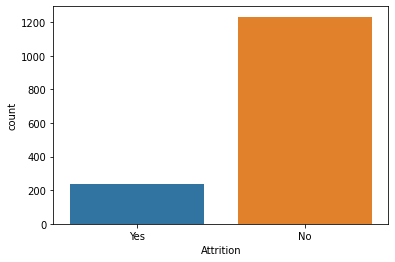

In [6]:
# ÌÉÄÍ≤ü ÌÉÄÏûÖÏùÑ ÏÇ¥Ìé¥Î≥¥Î©¥ Î∂ÑÎ•òÎ°ú Ï†ëÍ∑ºÌï¥ÏïºÌï† Í≤É Í∞ôÏäµÎãàÎã§.
# ÌÉÄÍ≤üÏùò Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§. -> Î∂ÑÎ•òÏùò BaselineÏùÄ ÏµúÎã§ ÎπàÎèÑÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏßÑÌñâÌï©ÎãàÎã§. 
df['Attrition'].value_counts()

# ÏãúÍ∞ÅÌôî ÏßÑÌñâ - ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Attrition'].value_counts())

# Î∞îÎ°ú ÏãúÍ∞ÅÌôî ÏßÑÌñâ
%matplotlib inline
sns.countplot(x=df['Attrition'])

In [7]:
# ÌÉÄÍ≤ü Í∞íÏùÑ Î≥ÄÍ≤ΩÌï©ÎãàÎã§. No = 0, Yes = 1
df['Attrition'] = df['Attrition'].replace({'No':0, 'Yes':1})

# ÌÉÄÍ≤üÏùò ÏµúÎã§ ÎπàÎèÑÏàòÎ•º ÏÑ†ÌÉùÌï©ÎãàÎã§.
major = df['Attrition'].mode()[0]
major

# ÌÉÄÍ≤üÏùò ÏÉòÌîå ÏàòÎßåÌÅº '0'Í∞íÏù¥ Îã¥Í∏¥ Î¶¨Ïä§Ìä∏Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§. => Í∏∞Ï§ÄÎ™®Îç∏Î°ú ÏòàÏ∏°ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§. 
y_pred = [major] * len(df['Attrition'])

# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§. 
from sklearn.metrics import accuracy_score

# Î≤†Ïù¥Ïä§ÎùºÏù∏Ïùò Ï†ïÌôïÎèÑ
print('baseline accuracy:', accuracy_score(df['Attrition'], y_pred))

baseline accuracy: 0.8387755102040816


#### Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìï©ÎãàÎã§.

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size =0.8, test_size=0.2, stratify = df['Attrition'], random_state = 42)

train.shape, test.shape

# ÌÉÄÍ≤ü ÏßÄÏ†ï.
target = 'Attrition'

# ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ : ÌÉÄÍ≤ü Î∞è ÌîºÏ≤ò ÏßÄÏ†ï
y_train = train[target]
X_train = train.drop(target, axis=1)

# ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞ : ÌÉÄÍ≤ü Î∞è ÌîºÏ≤ò ÏßÄÏ†ï
y_test = test[target]
X_test = test.drop(target, axis=1) 



In [9]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## **Part 2. Î™®Îç∏ ÌïôÏäµ**

- ÌÉÄÍ≤ü LabelÏùÑ `No=0`, `Yes=1`Î°ú Î≥ÄÌôòÌïòÏÑ∏Ïöî.
  - ÌõàÎ†®/ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î™®Îëê Î≥ÄÌôòÌï©ÎãàÎã§. 
- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïòÏó¨ Í∏∞Ï§ÄÎ™®Îç∏Ïùò AUC scoreÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.
  - Í∏∞Ï§ÄÎ™®Îç∏ÏùÄ ÏµúÎπàÍ∞íÏúºÎ°ú ÎßåÎì≠ÎãàÎã§.
- `OrdinalEncoder()`Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌäπÏÑ±ÏùÑ Ïù∏ÏΩîÎî©ÌïòÏÑ∏Ïöî. 
- `RandomForestClassifier()`Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÏÑ∏Ïöî. 
  - `random_state=42`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 
  - `n_jobs=-1`, `max_depth=3`ÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 
- `Cross_val_score()`Î•º ÌôúÏö©Ìï¥ÏÑú ÌïôÏäµÏãúÌÇ® ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Ïùò Í≤ÄÏ¶ù scoreÎ•º Íµ¨ÌïòÏÑ∏Ïöî.
  - `cv=10`, `n_jobs=-1`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 
  - `scoring`ÏùÄ `roc_auc`Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
  - Í≤ÄÏ¶ù scoreÎäî ÌèâÍ∑†Í∞íÏúºÎ°ú Íµ¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [10]:
# ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®ÏàòÎ•º ÏÉùÏÑ±ÌïòÏó¨ Î¥ÖÏãúÎã§.
# ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÉùÏÑ±ÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder

# Ï°∞Í±¥Ïóê Ï∂©Ï°±ÌïòÎäî ÌååÏù¥ÌîÑÎùºÏù∏ Ìï®ÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
def get_pipeline():
  return make_pipeline(
      OrdinalEncoder(),
      RandomForestClassifier(
          max_depth =3, n_jobs = -1, random_state =42, class_weight = 'balanced')
  )

# ÌååÏù¥ÌîÑÎùºÏù∏ ÏÉùÏÑ±
pipe = get_pipeline()

# ÌååÏù¥ÌîÑÎùºÏù∏ fit
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['BusinessTravel', 'Department',
                                      'EducationField', 'Gender', 'JobRole',
                                      'MaritalStatus', 'Over18', 'OverTime'],
                                mapping=[{'col': 'BusinessTravel',
                                          'data_type': dtype('O'),
                                          'mapping': Travel_Rarely        1
Travel_Frequently    2
Non-Travel           3
NaN                 -2
dtype: int64},
                                         {'col': 'Department',
                                          'data_type': dtype('O'),
                                          'mapping': Sales                     1
Resear...
                                         {'col': 'MaritalStatus',
                                          'data_type': dtype('O'),
                                          'mapping': Divorced    1
Married     2
Single     

#### ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÏßÑÌñâÌï©ÎãàÎã§.

In [11]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Í∞ÄÏ†∏ÏòµÏãúÎã§.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

# Î≤†Ïù¥Ïä§ÎùºÏù∏ Í∞í Ï†ïÏùò.
base_target = df[target]
base_features = df.drop(target, axis = 1)

#### 1. classification_report
* 1ÏùÑ ÏòàÏ∏°Ìï† ÌôïÎ•†Ïù¥ ÌòÑÏ†ÄÌûà Ï†ÅÏäµÎãàÎã§.
  * ÌÉÄÍ≤üÏùò Î∂ÑÌè¨Ïóê 0Ïùò Í∞íÏù¥ ÏÉÅÎãπÏàòÎ•º Ï∞®ÏßÄÌïòÏó¨ Ïù¥Îü∞ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò® Í≤É Í∞ôÏäµÎãàÎã§. 

In [12]:
# 1. classification_reportÎ•º ÏûëÏÑ±ÌïòÏó¨ Î¥ÖÏãúÎã§. 
print(classification_report(base_target, pipe.predict(base_features)))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1233
           1       0.46      0.66      0.55       237

    accuracy                           0.82      1470
   macro avg       0.70      0.76      0.72      1470
weighted avg       0.85      0.82      0.83      1470



#### 2. ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïòÏó¨ Í∏∞Ï§ÄÎ™®Îç∏Ïùò AUC scoreÎ•º ÌôïÏù∏ÌïòÍ∏∞.

2-1. Í∏∞Ï§ÄÎ™®Îç∏ AUC SCORE

In [13]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÏòàÏ∏°Í∞íÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
# 0Ïùº ÌôïÎ•†ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§. (ÏµúÎã§ ÎπàÎèÑ Í∞í.)
baseline_proba = pipe.predict_proba(base_features)[:,0]


# Ïù¥ÌõÑ ÌõàÎ†® Í∞í 
# Í∏∞Ï§ÄÎ™®Îç∏ Í∞íÏùÄ ÏúÑÏóêÏÑú Ï†ïÌï¥ÎÜìÏùÄ y_predÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
print(f'Auc : {roc_auc_score(base_target, baseline_proba)}')

Auc : 0.16183299625968017


2-2. Í∏∞Ï§ÄÎ™®Îç∏ Roc Curve & Confusion matrix ÏãúÍ∞ÅÌôî 

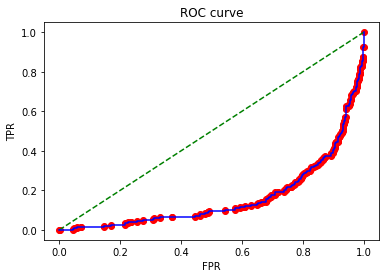

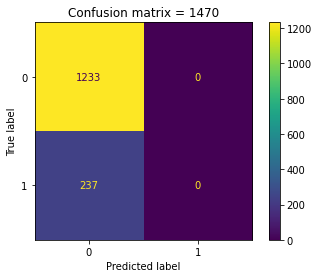

In [14]:
# Roc CurveÎ•º Î®ºÏ†Ä ÏÉùÏÑ±Ìï©ÎãàÎã§. 

baseline_fpr, baseline_tpr , _ = roc_curve(base_target, y_pred)
fpr, tpr, thresholds = roc_curve(base_target, baseline_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle ='--', color = 'green', label = 'Baseline')
plt.plot(fpr, tpr, color ='blue', label='Model')
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# ConfusionMatrix ÏÉùÏÑ±.
cm = confusion_matrix(base_target, y_pred, labels= pipe.named_steps['randomforestclassifier'].classes_)

# CM ÏãúÍ∞ÅÌôî
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = pipe.named_steps['randomforestclassifier'].classes_)

disp.plot()
plt.title(f'Confusion matrix = {len(base_target)}')
plt.show()

2-2.Í≤ÄÏ¶ù Í∞íÏúºÎ°ú ÏßÑÌñâÌïòÍ∏∞. 

In [15]:
# ÌååÏù¥ÌîÑÎùºÏù∏ ÏÉùÏÑ±
pipe = get_pipeline()

# fit
pipe.fit(X_train, y_train)

# ÌååÏù¥ÌîÑÎùºÏù∏Ïùò 'Í≤ÄÏ¶ùÏ†ïÌôïÎèÑ'
print(f'Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ : {pipe.score(X_test, y_test)}')

Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ : 0.782312925170068


2-3. Classification_Report

In [16]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       247
           1       0.39      0.64      0.48        47

    accuracy                           0.78       294
   macro avg       0.66      0.72      0.67       294
weighted avg       0.84      0.78      0.80       294



2-4. Roc Curve, Confusion Matrix ÏãúÍ∞ÅÌôî

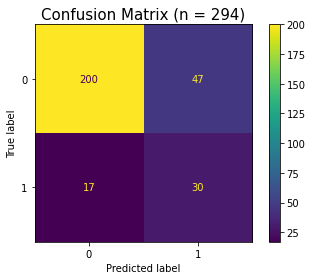

AUC : 0.7695753294857438


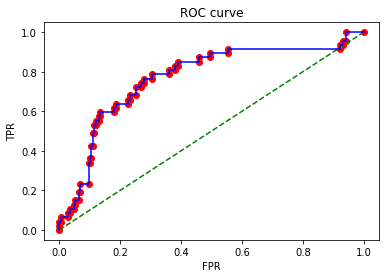

In [17]:
# ÏòàÏ∏°Í∞í ÏÑ§Ï†ï. 
pred = pipe.predict(X_test)

# CM ÏÉùÏÑ±
cm = confusion_matrix(y_test, pred, labels = pipe.named_steps['randomforestclassifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                              display_labels = pipe.classes_)

disp.plot()
plt.title(f'Confusion Matrix (n = {len(y_test)})', fontsize=15)
plt.show()

#1. Roc Curve ÏÉùÏÑ±.
y_pred_proba = pipe.predict_proba(X_test)[:, -1]
print(f'AUC : {roc_auc_score(y_test, y_pred_proba)}')


#1-2. baseline ÏÉùÏÑ±(ÏµúÎåÄ ÎπàÎèÑÍ∞íÏùÄ 0 ÏûÖÎãàÎã§.) 
baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0]*len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#1-3. ÏãúÍ∞ÅÌôî ÏßÑÌñâ.
plt.plot(baseline_fpr, baseline_tpr, linestyle='--', color='green', label = 'Baseline')
plt.plot(fpr, tpr, color = 'blue', label = 'Model')
plt.scatter(fpr, tpr, color = 'red')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##### **Q1. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Ïùò Í≤ÄÏ¶ù AUC scoreÎ•º ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ Ï†úÏ∂úÌï¥ Ï£ºÏÑ∏Ïöî.**

In [18]:
## AUC SCORE ÏÉùÏÑ±.
score = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,-1])
score

0.7695753294857438

## **Part 3. ÏàúÏó¥Ï§ëÏöîÎèÑ**

- `PermutationImportance()`Î•º ÏÇ¨Ïö©Ìï¥ `permuter`Î•º Ï†ïÏùòÌïòÏÑ∏Ïöî.
  - Î™®Îç∏ÏùÄ `randomforestclassifier`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
  - ÌèâÍ∞ÄÏßÄÌëúÎäî `roc_auc`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 
  - `n_iter=5`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 
  - `random_state=42`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
- ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïòÏó¨ ÌäπÏÑ±Ïóê Ordinal EncodingÏùÑ Ï†ÅÏö©ÌïòÍ≥†, `permuter`Î°ú scoreÎ•º Îã§Ïãú Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî. 
- eli5 ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò `.show_weights`Î•º ÏÇ¨Ïö©Ìï¥ ÌäπÏÑ±Î≥Ñ scoreÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.  
  - `top=None`ÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 
- scoreÍ∞Ä ÌèâÍ∑†Î≥¥Îã§ ÌÅ∞ ÌäπÏÑ±Îì§Îßå Ï∂îÏ∂úÌïòÏó¨ ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÏÑ∏Ïöî.
  - ÌÉÄÍ≤üÍ≥º ÌäπÏÑ±(scoreÍ∞Ä ÌèâÍ∑†Î≥¥Îã§ ÌÅ∞)ÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§.
  - ÌõàÎ†®/ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂ÑÎ¶¨Ìï©ÎãàÎã§. 
    - ÌõàÎ†®/ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏú®ÏùÄ 8:2Î°ú Ìï©ÎãàÎã§.
    - `random_state=42`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 
  - ÌäπÏÑ±ÏùÄ Ordinal EncodingÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§. 
  - `RandomForestClassifier()`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÌï©ÎãàÎã§.
    - `random_state=42`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 
    - `n_jobs=-1`, `max_depth=3`ÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 
- `Cross_val_score()`Î•º ÌôúÏö©Ìï¥ÏÑú ÌïôÏäµÏãúÌÇ® ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Ïùò Í≤ÄÏ¶ù scoreÎ•º Íµ¨ÌïòÏÑ∏Ïöî.
  - `cv=10`, `n_jobs=-1`Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§. 
  - `scoring`ÏùÄ `roc_auc`Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
  - Í≤ÄÏ¶ù scoreÎäî ÌèâÍ∑†Í∞íÏúºÎ°ú Íµ¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.
- ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïòÏó¨ Î™®Îç∏Ïùò AUC scoreÎ•º Íµ¨ÌïòÏÑ∏Ïöî.

##### **Q2. ÏàúÏó¥Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞ Í≤∞Í≥º scoreÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ ÌäπÏÑ±Ïùò Ïù¥Î¶ÑÏùÑ Ï†úÏ∂úÌï¥ Ï£ºÏÑ∏Ïöî.**

`column : overtime` Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ ÌäπÏÑ±ÏûÖÎãàÎã§.

##### **Q3. ÏÉÅÏúÑ ÌäπÏÑ±ÏúºÎ°ú ÌïôÏäµÌïú ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏Ïùò Í≤ÄÏ¶ù AUC scoreÎ•º ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ Ï†úÏ∂úÌï¥ Ï£ºÏÑ∏Ïöî.**

##### **Q4. ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïòÏó¨ Î™®Îç∏Ïùò AUC scoreÎ•º ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ Ï†úÏ∂úÌï¥ Ï£ºÏÑ∏Ïöî.**

#### 3-1. `permuter & Imputer` ÏÉùÏÑ±ÌïòÍ∏∞.

In [19]:
# Î®ºÏ†Ä, Ï°∞Í±¥Ïóê Ï∂©Ï°±ÌïòÎäî ÌååÏù¥ÌîÑÎùºÏù∏ Ìï®ÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§. 

def get_pipeline():
  return make_pipeline(
      OrdinalEncoder(),
      RandomForestClassifier(
          max_depth = 3,
          n_jobs = -1,
          random_state = 42,
          class_weight = 'balanced'
      )
  )

# Ïù¥ÌõÑ permuterÎ•º Ï†ïÏùòÌï©ÎãàÎã§, Ïù¥Îïå Î™®Îç∏ÏùÄ RandomforestClassifierÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§. 
permuter = PermutationImportance(
    pipe.named_steps['randomforestclassifier'],
    scoring = 'roc_auc',
    n_iter = 5, 
    random_state = 42)

# ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïòÏó¨ ÌäπÏÑ±Ïóê Ordinal EncodingÏùÑ Ï†ÅÏö©ÌïòÍ≥†, permuter Î°ú scoreÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
# ÌååÏù¥ÌîÑÎùºÏù∏Ïùò 'Ordinal_Encoding'Ïóê Ï†ëÍ∑ºÌï©ÎãàÎã§. 

X_test_preprocessed = pipe[0].transform(X_test)
permuter.fit(X_test_preprocessed, y_test)

PermutationImportance(estimator=RandomForestClassifier(class_weight='balanced',
                                                       max_depth=3, n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='roc_auc')

Text(0.5, 1.0, 'Permutation Importance')

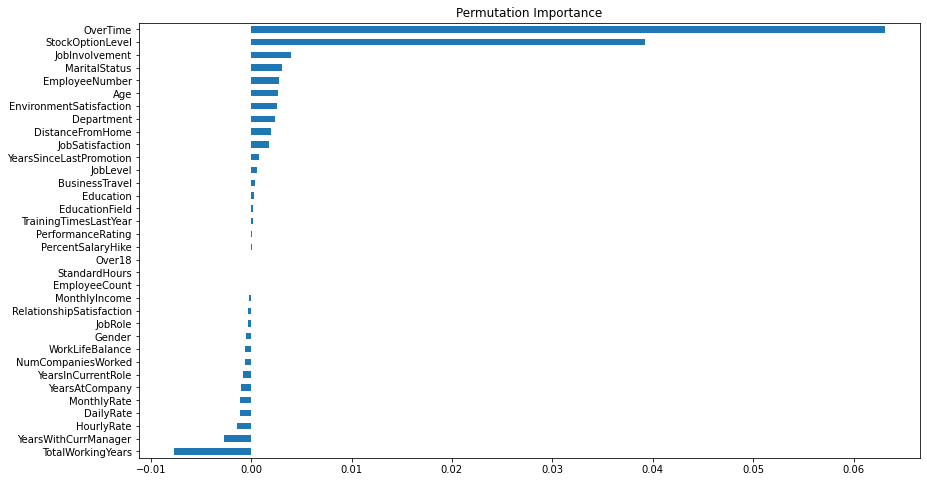

In [20]:
# Ïù¥ÌõÑ, eli5 ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÏó¨ Permutation ImportanceÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§. 
# index ÌòïÌÉúÎäî tolist() Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌòïÌÉúÎ•º list ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤ΩÌï† Ïàò ÏûàÏäµÎãàÎã§.
feature_names = X_test.columns.tolist()
feature_names

# Ïù¥ÌõÑ ÏãúÎ¶¨Ï¶àÎ•º ÏÉùÏÑ±ÌïòÎ©∞, Í∞íÏùÑ Ï†ïÎ†¨Ìï©ÎãàÎã§.
pi= pd.Series(permuter.feature_importances_, feature_names).sort_values()

# matplotlib ÏãúÍ∞ÅÌôî Í∏∞Î≥∏ ÏÑ§Ï†ï Î≥ÄÍ≤Ω(Îçî ÌÅ¨Í≤å)
plt.rcParams["figure.figsize"] = (14,8)


#ÏãúÍ∞ÅÌôîÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
pi.plot.barh()

# Ï†úÎ™©ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
plt.title('Permutation Importance')

ÌèâÍ∑† Í∞íÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.


In [21]:
mean_score = pi.mean()
mean_score

0.003169954345766204

#### 3-2. `eli5`Î•º Ïù¥Ïö©ÌïòÏó¨ ÌäπÏÑ±Î≥Ñ scoreÎ•º ÌôïÏù∏Ìï©ÎãàÎã§.

In [22]:
eli5.show_weights(
    permuter,
    top = None,
    feature_names = feature_names)

#### score Í∞Ä ÌèâÍ∑†Î≥¥Îã§ ÌÅ∞ ÌäπÏÑ±ÏúºÎ°ú Îã§Ïãú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌï©ÎãàÎã§.
* Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Î•º ÌõàÎ†® & ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú Îã§Ïãú Î∂ÑÎ¶¨Ìï©ÎãàÎã§.

# ü•á **ÎèÑÏ†Ñ Í≥ºÏ†ú**

## **Part 4. ÌîÑÎ°úÏ†ùÌä∏ Ï§ÄÎπÑ**

> Îã§ÏùåÏ£ºÎ∂ÄÌÑ∞ ÌîÑÎ°úÏ†ùÌä∏Í∞Ä ÏßÑÌñâÎê©ÎãàÎã§. <br>
> Í¥ÄÏã¨ÏûàÎäî ÌîÑÎ°úÏ†ùÌä∏ Ï£ºÏ†úÏôÄ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¥Ìé¥Î≥¥ÏãúÍ≥†, Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÌï¥Ï°åÎã§Î©¥ Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Î°ú ÎèÑÏ†ÑÍ≥ºÏ†úÎ•º ÏßÑÌñâÌï¥Î≥¥ÏÑ∏Ïöî.

- ÌîÑÎ°úÏ†ùÌä∏Ïóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨Ïò§ÏÑ∏Ïöî.
- Î™®Îì† ÌäπÏÑ±Ïóê ÎåÄÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥†, ÌèâÍ∞ÄÏßÄÌëúÎ•º Íµ¨ÌïòÏÑ∏Ïöî. 
  - ÌÉÄÍ≤üÍ≥º Î¨∏Ï†úÏóê Ï†ÅÌï©Ìïú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. 
- ÏàúÏó¥Ï§ëÏöîÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî.
- ÏàúÏó¥Ï§ëÏöîÎèÑÏùò ÏÉÅÏúÑ ÌäπÏÑ±Îßå ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥†, ÌèâÍ∞ÄÏßÄÌëúÎ•º Íµ¨ÌïòÏÑ∏Ïöî. 
- Î™®Îì† ÌäπÏÑ±Ïóê ÎåÄÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÌñàÏùÑ ÎïåÏôÄ ÏÉÅÏúÑ ÌäπÏÑ±Îßå ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÌñàÏùÑ ÎïåÏùò ÌèâÍ∞ÄÏßÄÌëúÎ•º ÎπÑÍµêÌï¥ Î≥¥ÏÑ∏Ïöî. 